# Homework 3

## Taeho Hwang

Instructions: 

 1. Please replace "Yourname" above, and in the title of this notebook. 
 2. Import all the libraries you end up using in the cell below. Please only use those libraries which we have used in class (i.e. nltk, collections, pandas, etc.). 
 3. Complete all the exercises, replacing "enter code here" with your code, and "enter markdown here" with your markdown. Annotate with comments (lines beginning with `#`) or with markdown cells, to show how you arrived at your answers.  
 4. **From the Kernel menu, select "restart and run all." This is important! This will help me to see the output of your answers.** 
 5. Email me your completed notebook: jonathan.reeve@columbia.edu


In [1]:
# Import your libraries here. 
import pandas as pd
import nltk
import re
from collections import Counter

### 1. Write a function to find the longest word in a text. Use that function to find the longest word in _The Moonstone_, in _The Garden Party and Other Stories_, and in one other text of your choosing. 

You're free to define a "word" however you like, so long as you justify your definition below.

**Nota bene**: write an actual function, not just a code cell. 

In [2]:
# Enter code here. 
gardenParty = open("../Texts/garden-party.md", "r").read()
moonstone = open("../Texts/moonstone.md", "r").read()

def tokenedText(text):
    return nltk.word_tokenize(text)

def getCleanText(text):
    
    data_list = tokenedText(text)
    
    list_par = []
    for i in data_list:
#        print(i)
        text = re.sub('[^a-zA-Z0-9-]',' ', i).strip()
        if(text != ''):
            #print(text)
            list_par.append(text)
    return list_par

def getTheLongestWord(text):
    cleanedText = getCleanText(text)
    #print(cleanedText)
    df = pd.DataFrame(cleanedText, columns=["word"])

    print('Max length of word: %s\n' %  df.iloc[(df["word"].str.len().idxmax())].values[0])
    #print(df.iloc[5])
    #return df

print("gardenParty: ")
getTheLongestWord(gardenParty)
print("moonstone: ")
getTheLongestWord(moonstone)

gardenParty: 
Max length of word: knock-knock-knocking

moonstone: 
Max length of word: -Small-Clothes-Conversion-Society



### 2. Write a function to find the longest sentence in a text, calculated by number of words, and use that function to find the longest sentence in *The Moonstone* or *The Garden Party and Other Stories*. 

Then, in a markdown cell, explain what voice, character, or narrator is responsible for the sentence (i.e., who says it, and why). Why is it so long? And what else do you notice? That is, what characteristics do long sentences have, that short sentences don't? 

In [3]:
# Enter code here. 
def getSentenceToken(text):
    return nltk.sent_tokenize(text)

def getCleanTextSentence(text):
    
    data_list = getSentenceToken(text)
    
    list_par = []
    for i in data_list:
#        print(i)
        text = re.sub('[^a-zA-Z0-9-]',' ', i).strip()
        if(text != ''):
            #print(text)
            list_par.append(text)
    return list_par


def getTheLongestSentence(text):
    cleanedText = getCleanTextSentence(text)
    #print(cleanedText)
    df = pd.DataFrame(cleanedText, columns=["sentence"])

    print('Max length of sentence: %s\n' %  df.iloc[(df["sentence"].str.len().idxmax())].values[0])

print("gardenParty: ")
getTheLongestSentence(gardenParty)
print("moonstone: ")
getTheLongestSentence(moonstone)

gardenParty: 
Max length of sentence: But the difference between that dusty-smelling hall---with calico texts on the walls  the poor terrified little woman in a brown velvet toque with rabbit s ears thumping the cold piano  Miss Eccles poking the girls  feet with her long white wand---and this was so tremendous that Leila was sure if her partner didn t come and she had to listen to that marvellous music and to watch the others sliding  gliding over the golden floor  she would die at least  or faint  or lift her arms and fly out of one of those dark windows that showed the stars

moonstone: 
Max length of sentence: On this  the disconnected words  and fragments of sentences  which had dropped from Mr  Candy in his delirium  appeared as follows      Mr  Franklin Blake   and agreeable   down a peg   medicine   confesses   sleep at night   tell him   out of order   medicine   he tells me   and groping in the dark mean one and the same thing   all the company at the dinner-table   I say   g

It seems like a long sentence to describe a particular situation. The sentence gets longer, especially when writer describe it in detail. Even when describing a continuous situation, the sentence is lengthened to express the order.

### 3. Choose a narrator from *The Moonstone*, and find that narrator's distinctive words. Then, in a markdown cell, write a paragraph about what you notice, especially how it may reveal that narrator's personality. 

In [4]:
moonstoneParts = moonstone.split("\n##")

moonstoneParts2 = moonstone.split("\n## ")

def counted(textString):
    lowered = textString.lower()
    lowered = lowered.replace('-', ' - ')
    lowered = lowered.replace('*', ' ')
    tokens = nltk.word_tokenize(lowered)
    counted = Counter(tokens)
    return counted

def numWords(textString):
    lowered = textString.lower()
    tokens = nltk.word_tokenize(lowered)
    return len(tokens)


moonstoneNarrators = {"Miss Clack" : "",
             "Mathew Bruff": "",
             "Franklin Blake": "",
             "Ezra Jennings": "",
             "Sergeant Cuff": "",
             "Mr. Candy": "",
             "Gabriel Betteredge": ""
            }

with open("/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md", "r") as f:
    moonstone = f.read()
    moonstoneChapter = re.split('## [a-zA-Z]* Period', moonstone)
    #print(moonstoneChapter[2])
    chapterNarrative = re.split('## [a-zA-Z]* Narrative', moonstoneChapter[2])
    moonstoneNarrators["Gabriel Betteredge"] += moonstoneChapter[1]
    for index in range(1, len(chapterNarrative)):
        for narrator in moonstoneNarrators:
            if narrator.lower() in chapterNarrative[index][:50].strip().split('\n')[0].lower():
                moonstoneNarrators[narrator] += chapterNarrative[index]
                break


# for narrator, story in moonstoneNarrators.items():
#     print(narrator, " : \n", story[:200], "\n"* 3)
    
betteredge = moonstoneNarrators["Gabriel Betteredge"]
clack = moonstoneNarrators["Miss Clack"]
bruff = moonstoneNarrators["Mathew Bruff"]
blake = moonstoneNarrators["Franklin Blake"]

allCounts = {"betteredge" : counted(betteredge),
            "clack": counted(clack), "bruff": counted(bruff), "blake": counted(blake)}


narratorsDF = pd.DataFrame(allCounts).fillna(0)
allNumWords = [numWords(narrator) for narrator in [betteredge, clack, bruff, blake]]

narratorsFreqDF = narratorsDF / allNumWords
narratorsFreqDF["average"] = narratorsFreqDF.mean(axis = 1)

def distinctiveWords(narrator, df):
    narr = df[narrator]
    average = df['average']
    distinction = narr - average
    return distinction

def mostDistincetive(distinctiveSeries):
    return distinctiveSeries.sort_values(ascending = False).head(40)

def leastDistincetive(distinctiveSeries):
    return distinctiveSeries.sort_values().head(40)

for character in allCounts:
    print(character, ": ")
    distinctiveSeries = distinctiveWords(character, narratorsFreqDF)
    #print(clack)
    print(mostDistincetive(distinctiveSeries))
    print()
    # print(leastDistincetive(distinctiveSeries))

betteredge : 
,                 0.005928
sergeant          0.002547
franklin          0.002411
and               0.002010
’                 0.001813
as                0.001696
out               0.001471
rosanna           0.001426
a                 0.001240
cuff              0.001232
she               0.001171
-                 0.001150
says              0.001095
lady              0.001048
the               0.000963
her               0.000933
s                 0.000876
penelope          0.000830
up                0.000677
girl              0.000663
about             0.000652
t                 0.000650
them              0.000620
;                 0.000614
way               0.000594
miss              0.000574
our               0.000572
when              0.000552
said              0.000549
servants          0.000542
got               0.000536
spearman          0.000519
mistress          0.000518
superintendent    0.000506
came              0.000475
us                0.000471
with          

There are lots of quotes in the sentence of *betteredge*. It seems that he's delivering someone's words or he's talking a lot of things.
As much as *bruff* is a solicitor, he used the word 'evidence' a lot. It's consistent that his job is to collect evidence.
*Blake* mentions betteredge a lot because there are many scenes where he talks with Betteredge.

### 4. Find the Katherine Mansfield story, or the narrator of _The Moonstone_, with the highest proportion of adverbs. What are some of those adverbs, and how are they used in context?

Make sure these are proportions of adverbs (i.e., adjusted for the total number of words). 

To get their context, you might want to run a concordance. 

In [5]:

from nltk.text import Text

theHighestProportionOfAdverb = 0
theHighestProportionOfAdverbCharcter = ""
adverbList = list()

characters = {"betteredge": betteredge, "clack": clack, "bruff": bruff, "blake": blake}

for character, story in characters.items():
    countingAdverb = 0
    countingWords = 0
    tempAdverbList = []
    tokenizedWords = nltk.word_tokenize(story)
    posWords = nltk.pos_tag(tokenizedWords)
    for p in posWords:
        countingWords += 1
        if "RB" in p[1]:
            countingAdverb +=1     
            tempAdverbList.append(p[0])
    if theHighestProportionOfAdverbCharcter == "" or theHighestProportionOfAdverb < countingAdverb / countingWords:
        theHighestProportionOfAdverb = countingAdverb / countingWords
        theHighestProportionOfAdverbCharcter = character
        adverbList = tempAdverbList
        
print(theHighestProportionOfAdverbCharcter, theHighestProportionOfAdverb)
print(adverbList)
text = Text(nltk.word_tokenize(characters[theHighestProportionOfAdverbCharcter]))

#print(characters[theHighestProportionOfAdverbCharcter])
for index in range(5):
    print(adverbList[index], ":")
    text.concordance(adverbList[index])
    
    
    

blake 0.047898402294141745
['eighteen', 'then', 'recently', 'longer', 'again', 'not', 'so', 'first', 'thus', 'back', 'seriously', 'actually', 'lively', 'only', 'never', 'no', 'more', 'abroad', 'away', 'never', 'more', 'effectually', 'less', 'steadily', 'now', 'just', 'steadily', 'back', 'again', 'irresistibly', 'when', 'again', 'here', 'only', 'not', 'privately', 'enough', 'ever', 'still', 'naturally', 'where', 'now', 'admirably', 'well', 'now', 'not', 'not', 'down', 'again', 'purposely', 'again', 'not', 'not', 'too', 'most', 'once', 'so', 'entirely', 'however', 'not', 'alone', 'over', 'again', 'back', 'literally', 'indignantly', 'not', 'not', 'so', 'ever', 'out', 'when', 'still', 'blindfold', 'innocently', 'there', 'as', 'ever', 'now', 'unaffectedly', 'innocently', 'nearly', 'still', 'again', 'where', 'again', 'once', 'well', 'never', 'again–there', 'then', 'inquiringly', 'exactly', 'apparently', 'most', 'Here', 'as', 'soon', 'here', 'as', 'much', 'naturally', 'enough', 'when', 'how',

In [6]:

theHighestProportionOfAdverb = 0
theHighestProportionOfAdverbChapter = 0
adverbList = list()

gardenPartyChapters = re.split(r'\# [1-9]. [a-zA-Z]*.', gardenParty)
epsilon = 0.00000001
for index, story in enumerate(gardenPartyChapters):
    # print(index)
    # print(story[:100])
    # print('\n\n')
    countingAdverb = 0
    countingWords = 0

    tempAdverbList = []
    tokenizedWords = nltk.word_tokenize(story)
    posWords = nltk.pos_tag(tokenizedWords)
    for p in posWords:
        countingWords += 1
        if "RB" in p[1]:
            countingAdverb +=1     
            tempAdverbList.append(p[0])
    if theHighestProportionOfAdverbChapter == 0 or theHighestProportionOfAdverb < countingAdverb / (countingWords + epsilon):
        theHighestProportionOfAdverb = countingAdverb / (countingWords + epsilon)
        theHighestProportionOfAdverbChapter = index
        adverbList = tempAdverbList
        
print(theHighestProportionOfAdverbChapter, theHighestProportionOfAdverb)
print(adverbList)

text = Text(nltk.word_tokenize(gardenPartyChapters[theHighestProportionOfAdverbChapter]))

#print(characters[theHighestProportionOfAdverbCharcter])
for index in range(5):
    print(adverbList[index], ":")
    text.concordance(adverbList[index])
    



3 0.07814887579122663
['Even', 'when', 'only', 'down', 'just', 'up', 'Why', 'ever', 'very', 'slowly', 'often', 'only', 'then', 'how', 'very', 'much', 'too', 'always', 'very', 'suddenly', 'nearly', 'Not', 'ago', 'when', 'simply', 'now', 'fiercely', 'terribly', 'sternly', 'well', 'almost', 'Well', 'else', "n't", 'quite', 'sincere', 'when', 'fully', 'then', 'when', 'well', 'again', 'very', 'well', "n't", 'absolutely', 'Then', 'till', 'now', 'when', 'father', 'so', 'down', 'even', 'very', "n't", 'Even', 'now', 'though', 'when', 'sadly', 'father', 'so', 'enough', 'how', 'crossly', 'now', 'just', 'mildly', 'again', "n't", "n't", "n't", "n't", 'not', "n't", 'how', 'slowly', 'more', 'loudly', "n't", 'when', "n't", 'rather', 'quickly', 'just', 'very', 'about', 'hardly', 'never', 'sagely', 'alone', 'just', "n't", 'now', 'rather', 'simply', "n't", 'just', 'then', 'absent-mindedly', "n't", 'absent-mindedly', 'very', 'when', 'long', 'away', '-away', 'where', 'When', 'when', 'simply', 'down', 'quite

### 5. Using an n-value of your choosing, find and compare the most frequent n-grams across texts in a corpus. Write about any trends you notice. 

You might want to look at trigrams, or 5-grams, or 7-grams. You may also find it useful to remove punctuation, or clean the text in some other way.

Corpora you might want to use might include: 

 - Narrators of _The Moonstone_
 - Categories of the Brown Corpus (in the NLTK)
 - Texts from the Gutenberg corpus (in the NLTK) 
 - Biden and Trump transcriptions from the 2020 presidential debates

In [7]:
from nltk import ngrams
#print(characters)

def cleanIt(text):
    data_list = nltk.word_tokenize(text)
    list_par = []
    for i in data_list:
        text = re.sub('[^a-zA-Z0-9]',' ',i).strip()

        if(text != ''):
            list_par.append(text)
    return " ".join(list_par)

for chracter, story in characters.items():
    print(chracter, ":")
    cleanedStory = cleanIt(story)
    for n in [3, 5, 7]:
        print("n:", n)
        print(Counter(ngrams(nltk.word_tokenize(cleanedStory), n)).most_common(n=1))
    print('\n\n')

betteredge :
n: 3
[(('Mr', 'Franklin', 's'), 55)]
n: 5
[(('on', 'the', 'subject', 'of', 'the'), 11)]
n: 7
[(('on', 'the', 'road', 'to', 'this', 'house', 'and'), 3)]



clack :
n: 3
[(('Mr', 'Godfrey', 's'), 19)]
n: 5
[(('at', 'the', 'Mothers', 'Small', 'Clothes'), 6)]
n: 7
[(('of', 'the', 'Mothers', 'Small', 'Clothes', 'Conversion', 'Society'), 3)]



bruff :
n: 3
[(('Mr', 'Godfrey', 'Ablewhite'), 11)]
n: 5
[(('on', 'the', 'subject', 'of', 'the'), 3)]
n: 7
[(('which', 'her', 'husband', 'had', 'placed', 'in', 'her'), 2)]



blake :
n: 3
[(('I', 'don', 't'), 32)]
n: 5
[(('the', 'letter', 'in', 'my', 'pocket'), 5)]
n: 7
[(('If', 'time', 'pains', 'and', 'money', 'can', 'do'), 2)]





Obviously, in the beginning, betteredge develops a story with Franklin, observes Franklin, and narrates various texts. So I could see that the n-gram "Mr franklin's" was the highest.

### 6. Find a pattern, of 2-5 words, at least one of which is a part of speech, that occurs at least thrice in _The Moonstone_. For example, you might look for JJS-NN (superlative - noun), very-JJ-NNP ("very" - adjective - proper noun), or '.'-CC (a period followed by a coordinating conjunction). What do you notice about your findings?

In [8]:
moonstoneTagged = nltk.pos_tag(nltk.word_tokenize(moonstone))


In [9]:
def findPattern(wordList, text):
    tag1, tag2 = wordList

    theOthers = []
    for i, wordTagPair in enumerate(text):
        if i == len(text) - 2:
            break
        word, tag = wordTagPair
        #print(wordTagPair)
        nextWord, nextNextTag = text[i+1]
        #nextNextWord, nextNextTag = text[i+2]
        if tag == tag1:
            if nextNextTag == tag2:
                # if nextNextTag == tag3:
                #     #print([word, nextWord, nextNextWord])
                    theOthers.append([word, nextWord])
    return theOthers


findPattern(["JJS", "NN"], moonstoneTagged)

[['longest', 'tongue'],
 ['shortest', 'temper'],
 ['nicest', 'boy'],
 ['hardest', 'driver'],
 ['eldest', 'sister'],
 ['best', 'thing'],
 ['plainest', 'woman'],
 ['shortest', 'way'],
 ['nearest', 'town'],
 ['best', 'horse'],
 ['fleetest', 'horse'],
 ['most', 'part'],
 ['hardest', 'day'],
 ['best', 'friend'],
 ['worst', 'enemy'],
 ['finest', 'creature'],
 ['finest', 'man'],
 ['worst', 'advice'],
 ['smallest', 'provocation'],
 ['harvest', 'moon'],
 ['truest', 'regard'],
 ['blackest', 'view'],
 ['smallest', 'degree'],
 ['slightest', 'mistake'],
 ['friendliest', 'manner'],
 ['best', 'place'],
 ['strangest', 'manner'],
 ['greatest', 'faith'],
 ['best', 'excuse'],
 ['oddest', 'manner–half'],
 ['best', 'way'],
 ['rarest', 'kind'],
 ['earliest', 'convenience'],
 ['shortest', 'way'],
 ['least', 'fear'],
 ['nearest', 'way'],
 ['maddest', 'part'],
 ['slightest', 'danger'],
 ['best', 'friend'],
 ['greatest', 'pleasure'],
 ['least', 'attention'],
 ['fittest', 'time'],
 ['quickest', 'way'],
 ['neares

Superlative and nouns are friends who always match.
I can select a good sentence order through pos analysis. This will allow me to grade people's essays.

### 7. Write 2-3 paragraphs where you describe one or two ideas for a final project. What text(s) will you analyze? What technologies will you use? What literary questions do you hope to answer? This doesn't have to be your final decision. 

I want to create a model that analyzes students' essays through natural language analysis.
  I will be able to find good sentences through POS tagging. I will be able to find good word orders in corpus such as Wikipedia and check students' expressiveness through whether they fit in this order or not.
  I will be able to judge students' vocabulary through type token ratio. Good grades will be gotten to students who use a lot of good words.
  I will be able to extract keywords through tf-idf and compare how consistent they are with the students' answers. Whether the keyword is included is a very important scoring factor in the essay.

### 8. Choose **one** of the following mini-projects to complete. Make sure that in each case, you discuss your results in well-formatted markdown.  

(This question is worth three points. But again, please complete only **one** of the mini-projects below.)

1. Make a big list of color words using WordNet, and then use that to find the predominant color of "The Garden Party," in terms of color words. Then, in one paragraph, interpret your results in terms of the story. Make a visualization of your results. (You can get the colors right with something like pandas `DataFrame.plot(kind="pie", colormap="your-colors-here")`. You might have to read a little about how to use color maps.)

2. Make a function to calculate the ratio of male pronouns to female pronouns. Then use that to test the male/female pronoun ratio of each narrator of *The Moonstone*, or of each of Katherine Mansfield's stories. Create a chart with your results. Then write a paragraph where you interpret these results.

3. Calculate how proportions of parts of speech are different for each narrator in _The Moonstone_. Do any narrators stand out in their usage of certain parts of speech? Discuss your results, and support your findings with a few examples from the text. Create a bar chart with your results. 

4. Categorize the nouns (or verbs, or another POS) of _The Moonstone_, by getting their WordNet hypernyms. (Hint: you can get more specific results than just "entity" by stopping at a pre-specified `max_depth` or `min_depth`.) Create a visualization with your results. What trends do you notice here?

5. Download a few more Collins novels, either manually or programmatically, using [corpus-db.org](http://corpus-db.org). What are the words that appear in _The Moonstone_ more than other novels of Collins's? (Be sure to use frequencies, rather than raw counts.) If you disregard proper names ('NNP' in terms of POS), what are the remaining distinctive words? 

betteredge : 
[('NN . ', 14), ('JJ NNP . ', 12), ('RB JJ . ', 8), ('DT . ', 6), ('NNP . ', 4), ('UH . ', 4), ('EX . ', 3), ('CC EX . ', 3), ('RB . ', 3), ('PRP VBD DT NN . ', 3)]



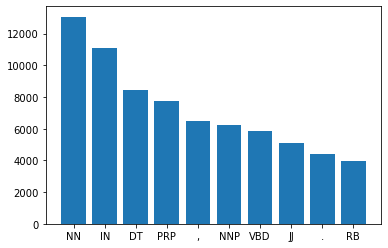

clack : 
[('NN . ', 8), ('DT . ', 7), ('UH . ', 7), ('JJ NNP . ', 5), ('DT JJ NN VBD PRP$ NN . ', 2), ('PRP VBD . ', 2), ('VB WP PRP VBP . ', 2), ('NNP NNP . ', 2), ('PRP VBD DT JJ NN . ', 2), ('RB IN DT NN RB . ', 2)]



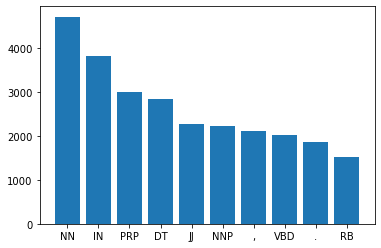

bruff : 
[('RB RB . ', 3), ('JJ NNP . ', 2), ('VBN IN NNP NNP , NNP , IN NNP NNP VBD NNP NNP # # # NN PRP VBP JJ NN , NNP NNP , VBG VBN RP DT NN , EX VBP CD NNS IN PRP$ VBG PRP RP JJ , IN PRP$ NN . ', 1), ('IN DT JJ NN , PRP VBP IN DT NN TO VB DT JJ NN IN JJ NNS IN NN WDT VBP RB RB VBN VBN IN DT NN . ', 1), ('NNP NNP VBD PRP$ JJ JJ NN IN VBG PRP$ NN NN PRP VBD IN DT NN IN PRP . ', 1), ('NNP NNP NNP VBD PRP$ JJ JJ NN IN VBG DT NN TO DT NN IN PRP$ VBG NN PRP VBD WP PRP VBD . ', 1), ('IN DT JJ NN , PRP VBD PRP$ JJ CC JJ NN , PRP RB VBD WDT , TO VB PRP RB VBP DT NN IN WDT PRP VBP RB VBP DT NN IN DT JJ NNP . ', 1), ('PRP VBD DT NN IN DT NN , IN PRP$ JJ NN , IN DT JJ NN IN JJ NNS , WP VBD DT JJ , RB , IN DT NN IN DT CD NNPS . ', 1), ('NNP TO DT , IN PRP VBD IN DT JJ NN , NNP NNP , DT NN NNS , CC IN PRP VBD DT NN IN PRP IN DT NN IN DT NNP , WDT VBZ DT RB JJ NN IN JJ NNS . ', 1), ('CC EX PRP VBP DT NN IN PRP$ NNS TO VB DT NN WDT PRP VBP IN DT NNS . ', 1)]



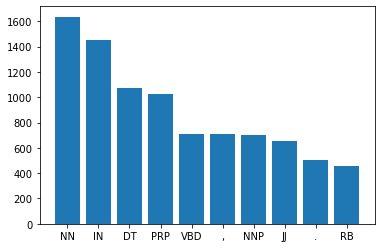

blake : 
[('JJ NNP . ', 13), ('DT . ', 9), ('NN . ', 6), ('RB . ', 3), ('RB RB . ', 3), ('JJ NNP . NN PRP VBD . ', 3), ('DT NN VBD . ', 3), ('PRP VBD IN DT NN IN DT NN . ', 2), ('NNS VBP VBN . ', 2), ('PRP RB VBD PRP . ', 2)]



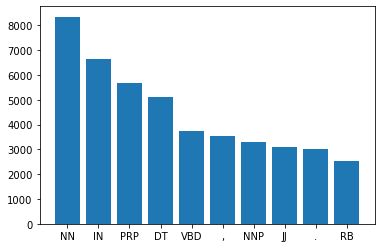

In [10]:
#3
import matplotlib.pyplot as plt




def getPosOrder(text):
    tempList = list()
    sentTokens = nltk.sent_tokenize(text)
    
    for s in sentTokens:
        
        wordTokens = nltk.word_tokenize(s)
        #print(wordTokens)        
        pos = nltk.pos_tag(wordTokens)
        tempStr = ""
        for p in pos:
            tempStr += p[1] + " "

        tempList.append(tempStr)
    #print(tempList)
    return Counter(tempList)

def getMostPos(text):
    tempList = list()
    sentTokens = nltk.sent_tokenize(text)
    posDict = dict()
    for s in sentTokens:
        wordTokens = nltk.word_tokenize(s)
        #print(wordTokens)        
        pos = nltk.pos_tag(wordTokens)

        for p in pos:
             if p[1] in posDict:
                posDict[p[1]] += 1
             else:
                posDict[p[1]] = 0


    #print(tempList)
    return posDict

for character,text in {"betteredge":betteredge, "clack": clack, "bruff": bruff, "blake": blake}.items():
    print(character, ": ")
    print(getPosOrder(text).most_common(10))
    print()
    posDict = getMostPos(text)
    # print(posDict)
    # print()

    posDict = {k: v for k, v in sorted(posDict.items(), key=lambda item: item[1], reverse=True)}
    plt.bar(range(10), list(posDict.values())[:10], align='center')
    plt.xticks(range(10), list(posDict.keys())[:10])
    plt.show()



In [13]:
def findPattern2(wordList, text):

    theOthers = []
    
    tempList = list()
    sentTokens = nltk.sent_tokenize(text)

    for s in sentTokens:
        wordTokens = nltk.word_tokenize(s)
        #print(wordTokens)        
        pos = nltk.pos_tag(wordTokens)
        #print(pos)
        flag = True
        for w, p in zip(wordList, pos):
            if w != p[1]:
                flag =False
        if flag:
            theOthers.append(s)
    return theOthers

print("betteredge")
print(findPattern2(["NN", "."], betteredge))
print("bluff")
print(findPattern2(["RB", "RB", "."], bruff))

print("clack")
print(findPattern2(["DT", "."], clack))



betteredge
['Lord!', 'Lord!', 'beautiful!', 'Look!” says Mr.', 'Nothing!', 'Lord!', 'Ah!', 'Stop!” says the\nSergeant, taking me away to the window, out of earshot, “Your\nSuperintendent here,” he went on, in a whisper, “has made a pretty full\nreport to me of the manner in which he has managed this case.', 'Ah!', 'Sad!', 'sad!–all the more sad because the\ngirl had no reason to justify her, and no right to feel it.', 'Lord!', 'Mind!', 'Lord!', 'Fool!', 'come!” he said,\n“why not treat my view of the case as her ladyship treats it?', 'Lord!', 'Franklin!']
bluff
['Very well.', '“Exactly.', 'Very well.']
clack
['No!', 'No!', 'no!', 'No!', 'No!', 'No!', 'No!']


I can see that *betteredge* uses a lot of exclamations such as load! look!
```
['Lord!', 'Lord!', 'beautiful!', 'Look!” says Mr.', 'Nothing!', 'Lord!', 'Ah!', 'Stop!” says the\nSergeant, taking me away to the window, out of earshot, “Your\nSuperintendent here,” he went on, in a whisper, “has made a pretty full\nreport to me of the manner in which he has managed this case.', 'Ah!', 'Sad!', 'sad!–all the more sad because the\ngirl had no reason to justify her, and no right to feel it.', 'Lord!', 'Mind!', 'Lord!', 'Fool!', 'come!” he said,\n“why not treat my view of the case as her ladyship treats it?', 'Lord!', 'Franklin!']
```
And I can see that *bluff* uses a lot of words that seem to evaluate things.
```
['Very well.', '“Exactly.', 'Very well.']
```
Clack shouted "No!" so many times. I think it's his habit.

### Bonus: Analyze your own annotations from _The Moonstone_, using any of the techniques we've learned. 

See [the annotation-analysis.ipynb notebook from the course repository](https://github.com/JonathanReeve/course-computational-literary-analysis/blob/master/Meta/annotation-analysis.ipynb) for an example of how to extract the text from Hypothes.is. 

Here are some ideas for things you could do: 

 - A stylistic comparison of your annotations with those of your classmates. Who do write like?
 - What words do you use that no one else does? What words do others use that you don't? 
 - What is the part of speech that you use more than everyone else? Less?

In [12]:
# Enter code here. 